<a href="https://colab.research.google.com/github/nandinisitlani2/python-forBI/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

%cd "/content/drive/MyDrive/Business Analyst course/Segmentation/Gaussian Mixture Model"

/content/drive/MyDrive/Business Analyst course/Segmentation/Gaussian Mixture Model


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

In [4]:
data=pd.read_csv("CreditCard.csv")

In [5]:
data.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


In [7]:
data=pd.get_dummies(data,drop_first=True)

##GMM MODEL

Text(0.5, 0, 'Number of components')

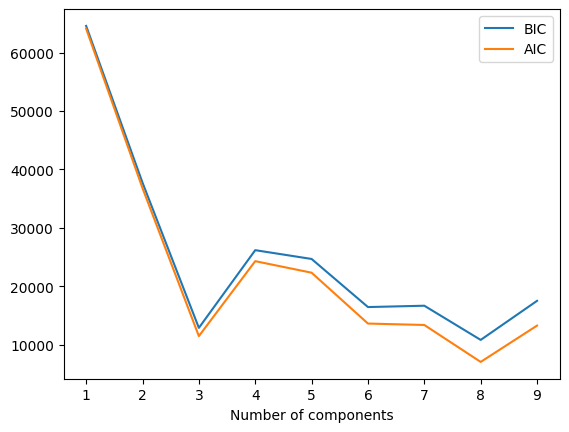

In [10]:
n_components=np.arange(1,10)
model=[GaussianMixture(n_components=n,
                       random_state=15).fit(data) for n in n_components]
plt.plot(n_components,
          [m.bic(data) for m in model],
          label="BIC")

plt.plot(n_components,
          [m.aic(data) for m in model],
          label="AIC")

plt.legend()
plt.xlabel("Number of components")

In [11]:
model=GaussianMixture(n_components=3,
                      random_state=15).fit(data)

In [12]:
pred_1=pd.Series(model.predict(data))

In [13]:
data["Cluster"]=pred_1

In [14]:
data.head()

,reports,age,income,share,expenditure,dependents,months,majorcards,active,card_yes,owner_yes,selfemp_yes,Cluster
0,0,37.66667,4.5200,0.033270,124.983300,3,54,1,12,1,1,0,2
1,0,33.25000,2.4200,0.005217,9.854167,3,34,1,13,1,0,0,2
2,0,33.66667,4.5000,0.004156,15.000000,4,58,1,5,1,1,0,2
3,0,30.50000,2.5400,0.065214,137.869200,0,25,1,7,1,0,0,2
4,0,32.16667,9.7867,0.067051,546.503300,2,64,1,5,1,1,0,2


In [17]:
data.Cluster.value_counts()

2    720
0    303
1    296
Name: Cluster, dtype: int64

In [22]:
pd.DataFrame(model.means_,
              columns=list(data.iloc[:,:-1].columns))

,reports,age,income,share,expenditure,dependents,months,majorcards,active,card_yes,owner_yes,selfemp_yes
0,0.435644,34.909241,3.549702,0.088288,242.607480,1.013201,68.000000,0.458746,7.379538,1.0,0.504950,0.207921
1,1.587838,33.202984,3.068509,0.000477,0.000000,1.077703,55.300676,0.739865,6.054054,0.0,0.304054,0.094595
2,0.000000,32.503472,3.409851,0.088563,236.916958,0.951389,49.895833,1.000000,7.223611,1.0,0.469444,0.000000


In [ ]:
###

#cluster 0 non credit users
# cluster 1 succesful entrepreneurs
#cluster 1 young employees